## Metric: &thinsp; Area of descent (ascent)
descent - wap > 0 <br>
ascent - wap < 0 <br>
<br>

**Available data** <br>
*No wap data:* <br>
cmip5: <br>
> 1. 'GISS-E2-H' <br>
> 2. 'HadGEM2-CC' <br>
> 3. 'EC-EARTH' <br>

cmip6: <br>
>- All models have data <br>

<br>

*Only monthly data:* <br>
cmip5: <br>
>1. 'CCSM4' <br>
>2. 'HadGEM2-AO' <br>
>3. 'inmcm4' <br>
>4. 'CESM1-BGC' <br>
>5. 'bcc-csm1-1' (experiment: 'rcp85') <br>

cmip6: <br>
>- All models are monthly <br>

In [46]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import seaborn as sns

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

import os
import sys
home = os.path.expanduser("~") + '/Documents'
sys.path.insert(0, '{}/code/phd/functions'.format(home))
from myFuncs import *

### one dataset

In [47]:
variable = 'wap500'

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3  no wap data
    # 'bcc-csm1-1',   # 4  only monthly wap (for rcp)
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6  only monthly wap
    # 'HadGEM2-AO',   # 7  only monthly wap
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9  no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13 only monthly wap
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 only monthly wap
    ]

models_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    'CESM2',          # 13
    'NESM3'           # 14
    ]

datasets = models_cmip5 + models_cmip6

resolutions = [
    # 'orig',
    'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85',
    # 'ssp585'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])
ds

variable:wap500, dataset:TaiESM1, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 360, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
    plev     float64 ...
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    wap500   (time, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0671-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     171550.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    variable_id:               wap
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/e871c66d-4f95-4535-88fe-a6071843749a

In [48]:
data = ds[variable]
data

<xarray.DataArray 'wap500' (time: 360, lat: 22, lon: 128)>
[1013760 values with dtype=float32]
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
    plev     float64 5e+04
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

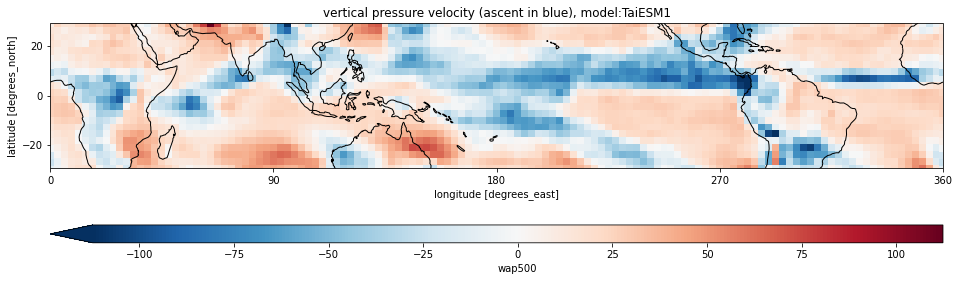

In [49]:
scene = data.isel(time=9)
cmap = 'RdBu_r'
title = 'vertical pressure velocity (ascent in blue), model:{}'.format(datasets[0])
vmin = -np.max(scene)
vmax = np.max(scene)
plot_scene(scene, cmap = cmap, title = title, vmin = vmin, vmax = vmax)

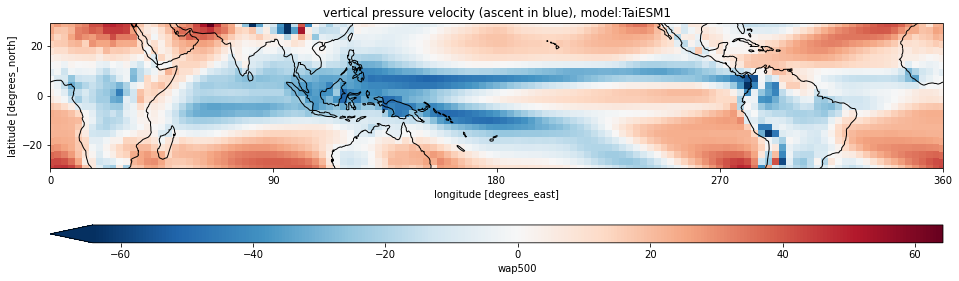

In [50]:
scene = data.mean(dim='time', keep_attrs=True)
cmap = 'RdBu_r'
title = 'vertical pressure velocity (ascent in blue), model:{}'.format(datasets[0])
vmin = -np.max(scene)
vmax = np.max(scene)
# vmin = -60
# vmax= 60
plot_scene(scene, cmap = cmap, title = title, vmin = vmin, vmax = vmax)

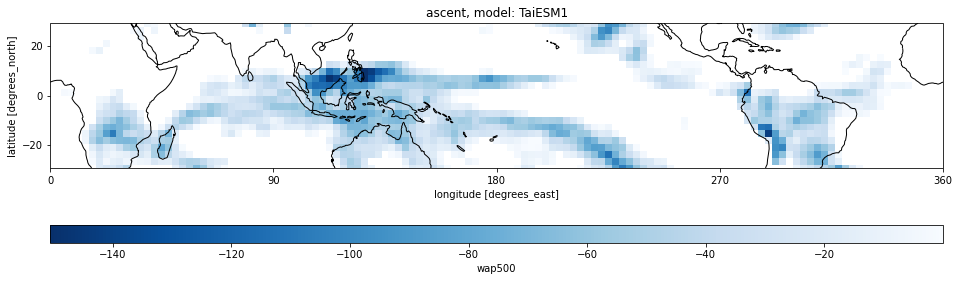

In [51]:
data_options = [
    'ascent',
    # 'descent'
    ]

data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
scene = data.isel(time=0)

if data_options[0] == 'ascent':
    cmap = 'Blues_r'
    title = 'ascent, model: {}'.format(datasets[0])
    plot_scene(scene.where(scene<0), cmap = cmap, title = title)
    data = data.where(data<0)

if data_options[0] == 'descent':
    cmap = 'Reds'
    title = 'Descent, model: {}'.format(datasets[0])
    plot_scene(scene.where(scene>0), cmap = cmap, title = title)
    data = data.where(data>0)

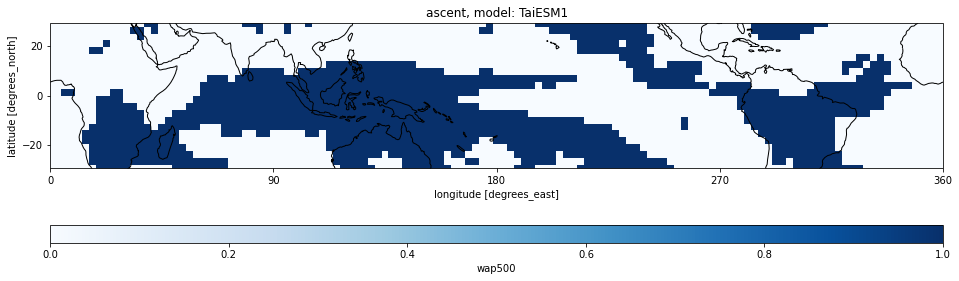

In [52]:
data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
scene = data.isel(time=0)

lat = data.lat.data
lon = data.lon.data
lonm,latm = np.meshgrid(lon,lat)
dlat = (lat[1]-lat[0])
dlon = (lon[1]-lon[0])
R = 6371
aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)

if data_options[0] == 'ascent':
    cmap = 'Blues'
    title = 'ascent, model: {}'.format(datasets[0])
    plot_scene(scene.where(scene<0)<0, cmap = cmap, title = title)
    data = data.where(data<0)<0
    data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

if data_options[0] == 'descent':
    cmap = 'Reds'
    title = 'Descent, model: {}'.format(datasets[0])
    plot_scene(scene.where(scene>0)>0, cmap = cmap, title = title)
    data = data.where(data>0)>0
    data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

# (wap_day<0).sum(dim=('lat', 'lon'))/(wap500_ascent.shape[1]*wap500_ascent.shape[2]) # for fraction of gridboxes

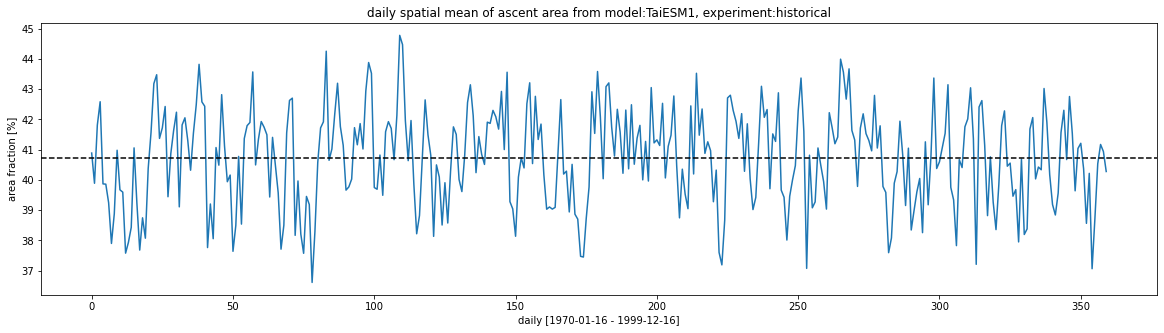

In [53]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    # 'monthly',
    'daily'
    ]

y= data
title = '{} spatial mean of {} area from model:{}, experiment:{}'.format(timeMean_options[0], data_options[0], datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('area fraction', '%')


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

### comparing datasets

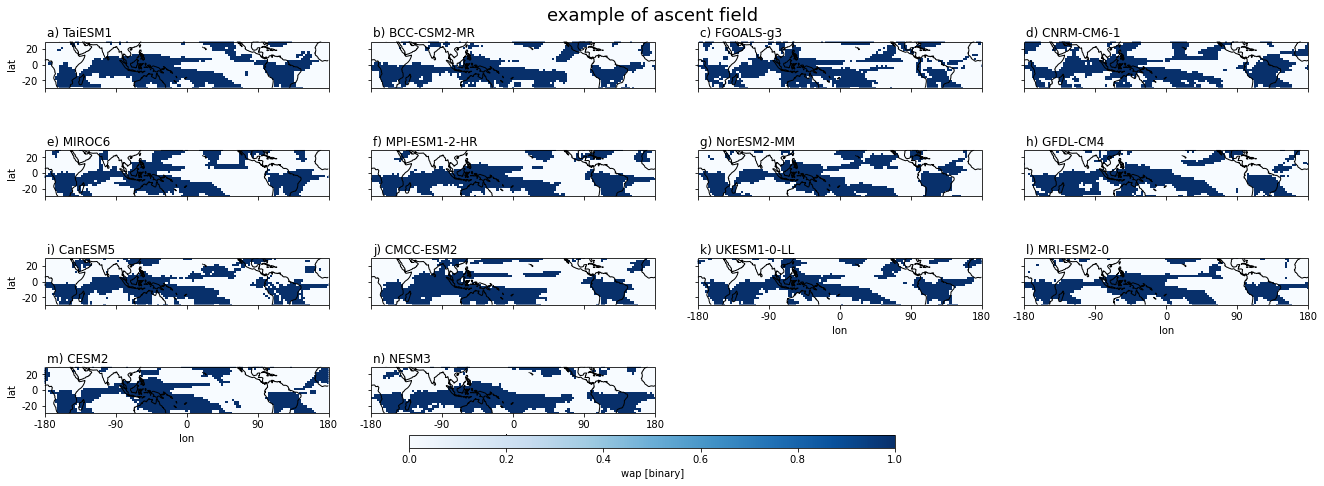

In [54]:
vmin, vmax = None, None 

fig= plt.figure(figsize=(22.5,17.5))
title = 'example of {} field'.format(data_options[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.75)
for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(4,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable].isel(time=0)

    if data_options[0] == 'ascent':
        cmap = 'Blues'
        data = data.where(data<0)<0

    if data_options[0] == 'descent':
        cmap = 'Reds'
        data = data.where(data>0)>0

    y = data
    pcm = plot_scene(y, cmap=cmap, zorder=0, ax=ax, vmin=vmin, vmax=vmax)
    
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.825)

cbar_ax = fig.add_axes([0.425, 0.4, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('wap', 'binary'))

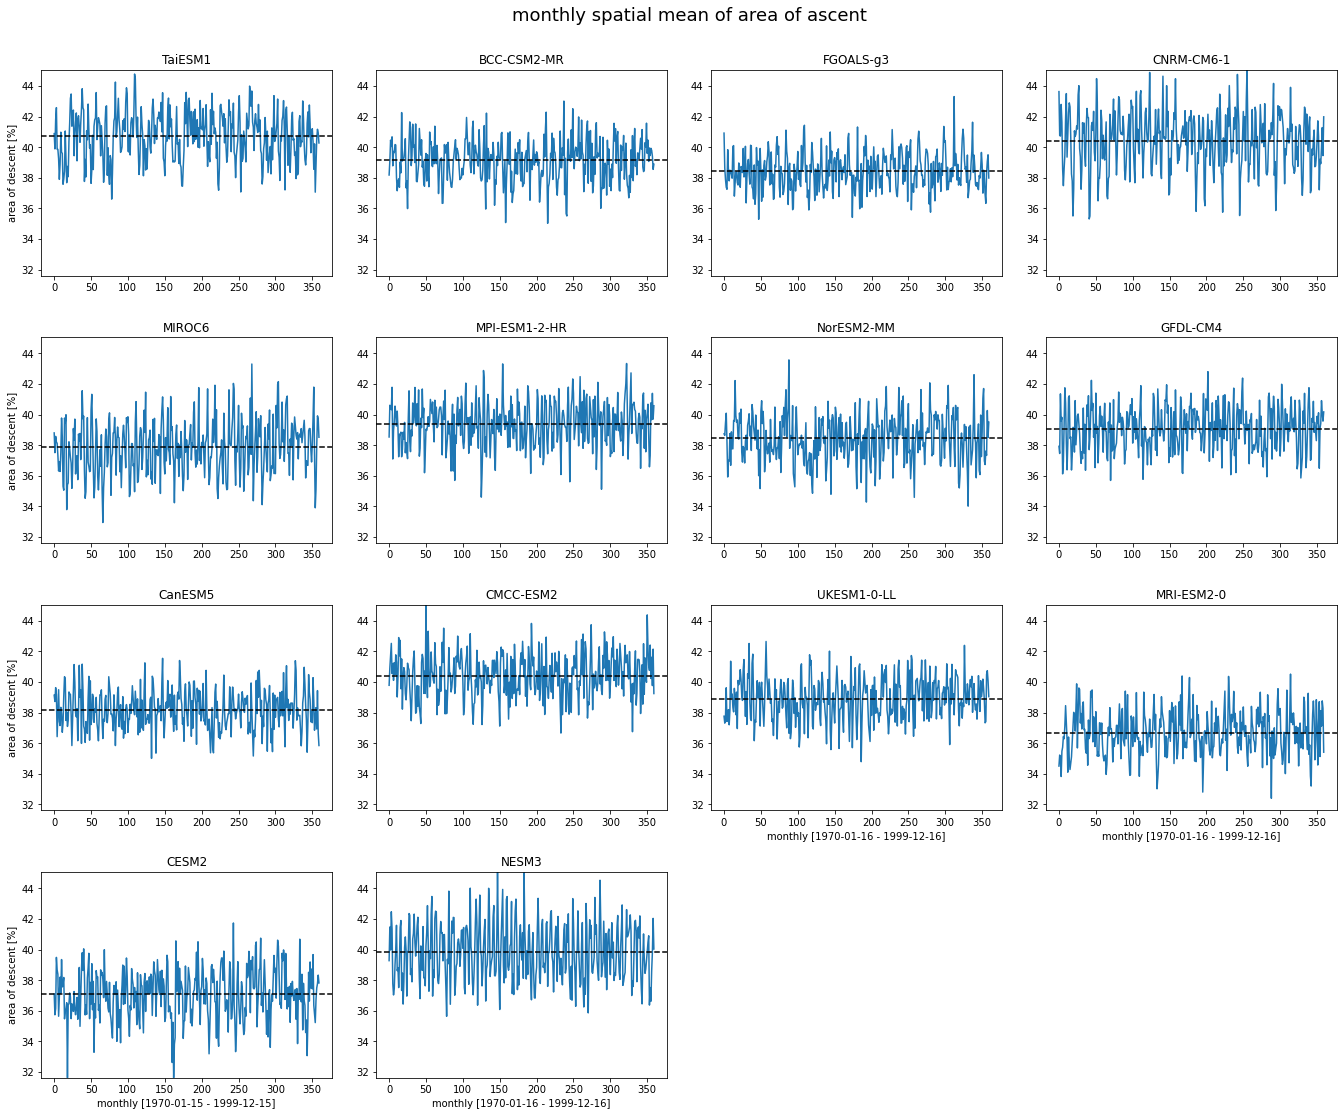

In [55]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

common_limits = True
quantile_low = 0
quantile_high = 1
if common_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
        lat = data.lat.data
        lon = data.lon.data
        lonm,latm = np.meshgrid(lon,lat)
        dlat = (lat[1]-lat[0])
        dlon = (lon[1]-lon[0])
        R = 6371
        aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    

        if data_options[0] == 'ascent':
            cmap = 'Blues'
            data = data.where(data<0)<0
            data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

        if data_options[0] == 'descent':
            cmap = 'Reds'
            data = data.where(data>0)>0
            data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
        y = data

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} spatial mean of {}'.format(timeMean_options[0], 'area of ascent')
fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(4,4,i+1)
    
    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
    lat = data.lat.data
    lon = data.lon.data
    lonm,latm = np.meshgrid(lon,lat)
    dlat = (lat[1]-lat[0])
    dlon = (lon[1]-lon[0])
    R = 6371
    aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    

    if data_options[0] == 'ascent':
        cmap = 'Blues'
        data = data.where(data<0)<0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

    if data_options[0] == 'descent':
        cmap = 'Reds'
        data = data.where(data>0)>0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

    y = data

    title = dataset
    plot_timeseries(y, title=title, timeMean_option=timeMean_options, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
        plt.xlabel(xlabel)

        if timeMean_options[0]=='seasonal':
            plt.legend()

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'area of descent [{}]'.format('%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

Text(0, 0.5, 'ascent [%]')

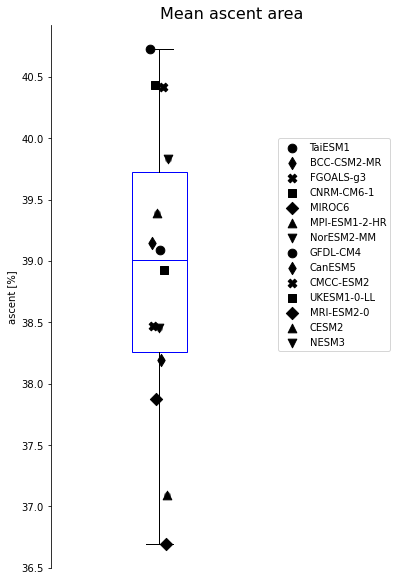

In [56]:
common_limits = False
quantile_low = 0
quantile_high = 1
if common_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
        lat = data.lat.data
        lon = data.lon.data
        lonm,latm = np.meshgrid(lon,lat)
        dlat = (lat[1]-lat[0])
        dlon = (lon[1]-lon[0])
        R = 6371
        aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    

        if data_options[0] == 'ascent':
            cmap = 'Blues'
            data = data.where(data<0)<0
            data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

        if data_options[0] == 'descent':
            cmap = 'Reds'
            data = data.where(data>0)>0
            data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
        y = data.mean(dim='time')

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 

order, colors = orderByTas(False, datasets, experiments[0], resolutions[0])

plt.figure(figsize=(6.5,10))
title = 'Mean {} area'.format(data_options[0], experiments[0])
plt.xlim(0,1)
# plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
    lat = data.lat.data
    lon = data.lon.data
    lonm,latm = np.meshgrid(lon,lat)
    dlat = (lat[1]-lat[0])
    dlon = (lon[1]-lon[0])
    R = 6371
    aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    

    if data_options[0] == 'ascent':
        cmap = 'Blues'
        data = data.where(data<0)<0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

    if data_options[0] == 'descent':
        cmap = 'Reds'
        data = data.where(data>0)>0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    y_data = data.mean(dim='time')

    y = np.append(y, y_data)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

labels = datasets
if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
        
    plt.legend(bbox_to_anchor=(0.95,0.8))


plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('{} [{}]'.format(data_options[0],'%'))

### with warming

Text(0, 0.5, 'ascent [% K⁻¹]')

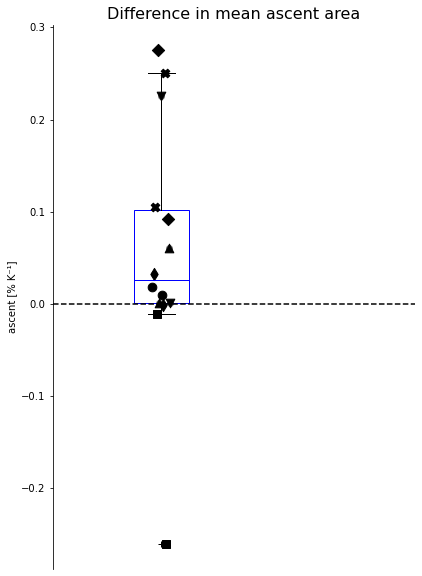

In [57]:
absolute_limits = False
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiment = 'historical', resolution=resolutions[0])[variable]
        lat = data.lat.data
        lon = data.lon.data
        lonm,latm = np.meshgrid(lon,lat)
        dlat = (lat[1]-lat[0])
        dlon = (lon[1]-lon[0])
        R = 6371
        aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    

        if data_options[0] == 'ascent':
            cmap = 'Blues'
            data = data.where(data<0)<0
            data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

        if data_options[0] == 'descent':
            cmap = 'Reds'
            data = data.where(data>0)>0
            data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
        y = data.mean(dim='time')
        data_historical = data.mean(dim='time')


        data = get_dsvariable(variable, dataset, experiment = 'rcp85', resolution=resolutions[0])[variable]

        if data_options[0] == 'ascent':
            cmap = 'Blues'
            data = data.where(data<0)<0
            data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

        if data_options[0] == 'descent':
            cmap = 'Reds'
            data = data.where(data>0)>0
            data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
        y = data.mean(dim='time')
        data_rcp = data.mean(dim='time')

        datadiff = data_rcp - data_historical

        fractional_change = True
        if fractional_change:
            datadiff = (datadiff/data_historical)*100

        divide_by_tasdiff = True
        if divide_by_tasdiff:
            tas_historical = get_metric('tas_sMean', dataset, experiment='historical', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
            tas_rcp = get_metric('tas_sMean', dataset, experiment='rcp85', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
            tasdiff = tas_rcp - tas_historical
            datadiff = datadiff/tasdiff

        y = datadiff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


order, colors = orderByTasdiff(False, datasets, models_cmip5, resolutions[0])


plt.figure(figsize=(6.5,10))
title = 'Difference in mean {} area'.format(data_options[0])
plt.xlim(0,1)
# plt.ylim(vmin-1, vmax+1)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiment = 'historical', resolution=resolutions[0])[variable]
    lat = data.lat.data
    lon = data.lon.data
    lonm,latm = np.meshgrid(lon,lat)
    dlat = (lat[1]-lat[0])
    dlon = (lon[1]-lon[0])
    R = 6371
    aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    

    if data_options[0] == 'ascent':
        cmap = 'Blues'
        data = data.where(data<0)<0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

    if data_options[0] == 'descent':
        cmap = 'Reds'
        data = data.where(data>0)>0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    data_historical = data.mean(dim='time')


    data = get_dsvariable(variable, dataset, experiment = 'ssp585', resolution=resolutions[0])[variable]
    if data_options[0] == 'ascent':
        cmap = 'Blues'
        data = data.where(data<0)<0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

    if data_options[0] == 'descent':
        cmap = 'Reds'
        data = data.where(data>0)>0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    data_rcp = data.mean(dim='time')

    datadiff = data_rcp - data_historical

    fractional_change = False
    if fractional_change:
        datadiff = (datadiff/data_historical)*100

    divide_by_tasdiff = True
    if divide_by_tasdiff:
        tas_historical = get_metric('tas_sMean', dataset, experiment='historical', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tas_rcp = get_metric('tas_sMean', dataset, experiment='ssp585', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tasdiff = tas_rcp - tas_historical
        datadiff = datadiff/tasdiff

    y_data = datadiff
    y = np.append(y, y_data)
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

labels = datasets
if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()

    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    # plt.legend(bbox_to_anchor=(0.95,0.8))

plt.axhline(y=0, color= 'k',  linestyle="--")
plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('{} [{}]'.format(data_options[0],'% K'+ chr(0x207B) + chr(0x00B9)))
# plt.ylim([-4,2])